In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.api import GLM
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/kgrat/OneDrive/Documents/ALY 6020/car.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [4]:
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
df.isnull().count()

MPG             398
Cylinders       398
Displacement    398
Horsepower      398
Weight          398
Acceleration    398
Model Year      398
US Made         398
dtype: int64

In [8]:
df.isna().count()

MPG             398
Cylinders       398
Displacement    398
Horsepower      398
Weight          398
Acceleration    398
Model Year      398
US Made         398
dtype: int64

In [9]:
df[df == '?'].count()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [10]:
df.Horsepower = df.Horsepower.replace('?','NaN').astype(float)
df.Horsepower.fillna(df.Horsepower.mean(),inplace=True)
df.horsepower = df.Horsepower.astype(int)

In [11]:
df[df == '?'].count()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [12]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [13]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

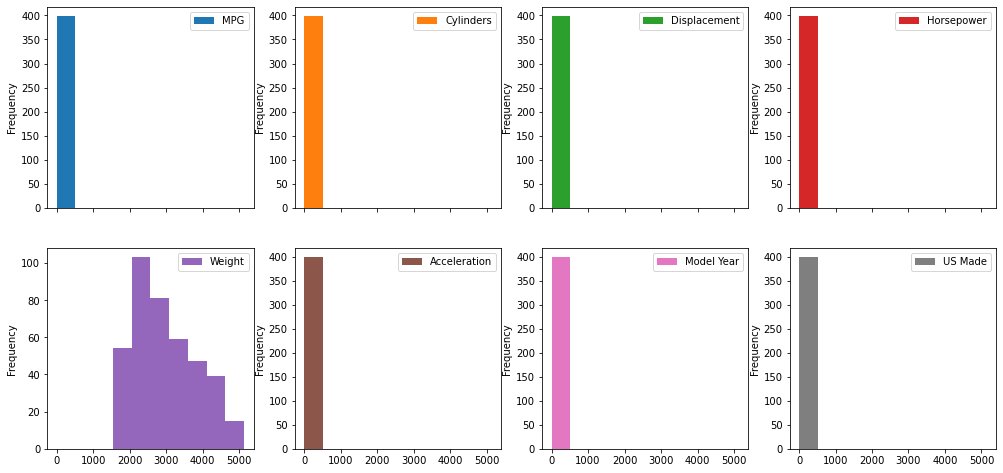

In [14]:
plt.figure(figsize=(20,20))
df.plot(kind = 'hist',subplots = 'True',layout = (4,4),figsize= (17,17))

In [15]:
c = df.corr()

In [16]:
c

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
MPG,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192
Cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351
Displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407
Horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083
Weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398
Acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806
Model Year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883
US Made,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000


In [17]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

<AxesSubplot:>

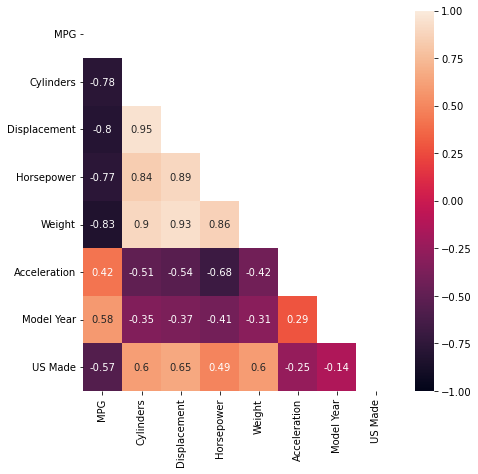

In [18]:
plt.figure(figsize=((7,7)))
sns.heatmap(c,annot=True, mask=mask, vmin=-1, vmax=1)

In [19]:
temp = pd.Series([variance_inflation_factor(df.values, i) for i in range (df.shape[1])], index = df.columns)
temp

MPG              55.565366
Cylinders       117.349873
Displacement    103.950859
Horsepower       62.470612
Weight          171.718801
Acceleration     67.412610
Model Year      314.411297
US Made           5.542247
dtype: float64

In [20]:
df_new = df.drop(['Cylinders','Displacement','Weight','MPG','Model Year'],axis=1)  #Dropped because of high nulticolinearity

In [21]:
temp1 = pd.Series([variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])],index=df_new.columns)
temp1  # here we see that US made and Model Year are highly collienar 

Horsepower      6.955488
Acceleration    4.580220
US Made         3.498193
dtype: float64

In [22]:
X = df[['US Made','Acceleration']]
y = df['MPG']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=123)

In [23]:
mod = LinearRegression()
mod.fit(X_train,y_train)
pred = mod.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [25]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 5.03
Mean squared error: 42.87
Root mean squared error: 6.55


In [45]:
x_cn = sm.add_constant(X_train)
model = sm.OLS(y_train,x_cn).fit()
print('Parmeters :',model.params)


Parmeters : const           15.197573
US Made         -9.021690
Acceleration     0.902785
dtype: float64


In [44]:
print('Model:',model.summary())

Model:                             OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.07e-38
Time:                        14:18:10   Log-Likelihood:                -884.13
No. Observations:                 278   AIC:                             1774.
Df Residuals:                     275   BIC:                             1785.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.1976      2.262      6

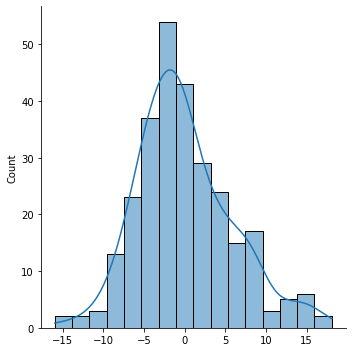

In [53]:

sns.displot(model.resid,kde = True, multiple="stack");

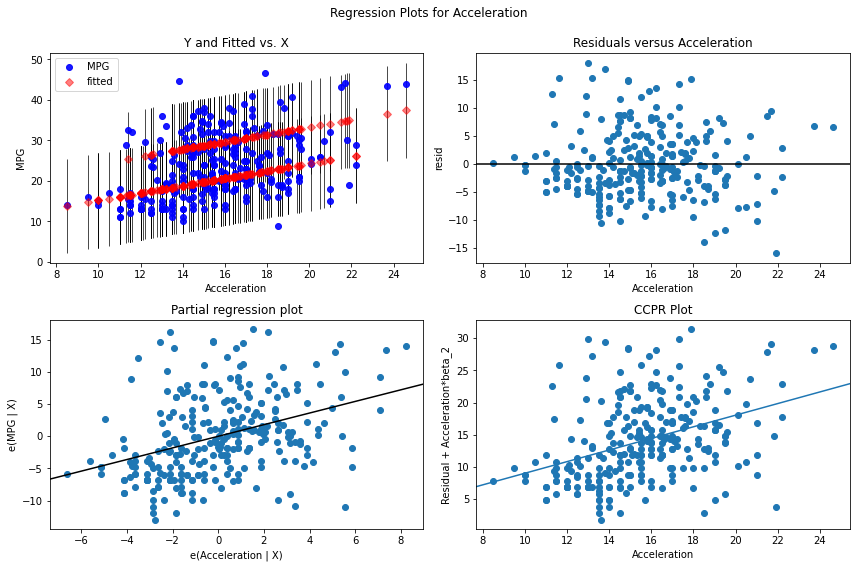

In [51]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Acceleration', fig)

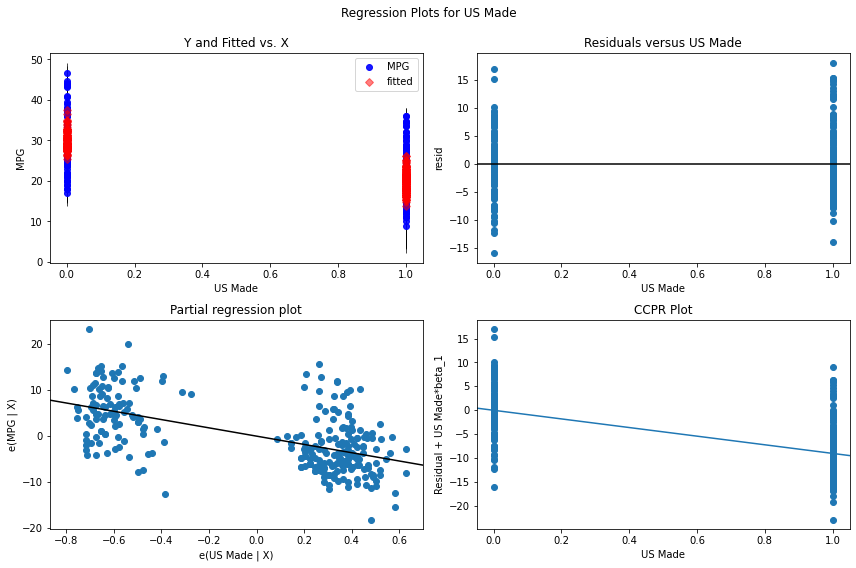

In [52]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'US Made', fig)